In [1]:
# loading data and data wrangling

# do K-means clustering analysis to find the proper value that could be used to filters out local landlords and companies

# do clustering analysis using Gaussian Mixture Model

In [2]:
import os
import numpy as np
import pandas as pd
print(os.getcwd())

/home/jovyan/work/fsds/group_work


In [3]:
# loading data and data wrangling
## loading data
df = pd.read_csv('/home/jovyan/work/fsds/group_work/data/airbnb/listings.csv', low_memory=False)

In [4]:
## data wrangling
### select the column of 'host_id' to make a new dataframe called df1
df1 = df[['host_id']]
num_rows = len(df1)
print(num_rows)

87947


In [5]:
### creat a new dataframe
# to make a column called ones (I don't like to use groupby().count, as the if i groupby the 'host_id' then the other like 'name' 
# that i select from df will show the count of 'host_id' that could be ambiguous)
### 使用 np.ones 创建一个每个元素都是 1 的数组
ones_array = np.ones((num_rows, 1))

### 将数组转换为 DataFrame
df_ones = pd.DataFrame(ones_array, columns=['ones'])
df1.head(3)
## make every lines' value of 'one' to be int
df1['ones'] = df_ones['ones'].astype(int)
df1.head(19)

/tmp/ipykernel_373/274559146.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ones'] = df_ones['ones'].astype(int)


,host_id,ones
0,54730,1
1,60302,1
2,498201,1
3,67564,1
4,499704,1
5,497514,1
6,41759,1
7,502496,1
8,103583,1
9,503548,1


In [6]:
### convert the values in the 'one' column of each row to integers
grouped_df1 = df1.groupby('host_id').sum()
grouped_df1 = grouped_df1.reset_index().rename(columns={'ones': 'counts'})
grouped_df1.head(14)

,host_id,counts
0,4775,6
1,4879,1
2,6774,7
3,9323,1
4,9870,1
5,10657,3
6,10953,1
7,11431,1
8,13690,1
9,14596,3


In [7]:
# do K-means clustering analysis to find the proper value that could be used to filters out local landlords and companies
## do K-means clustering analysis
from sklearn.cluster import KMeans
the_count = grouped_df1[['counts']]  # 使用双括号保持 DataFrame 格式


k_pref = 3  # 您选择的簇的数量
kmeans = KMeans(n_clusters=k_pref,  n_init=31, random_state=42)
kmeans.fit(the_count)

# join the cluter to the origin dataframe
grouped_df1['local_or_company'] = kmeans.labels_

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


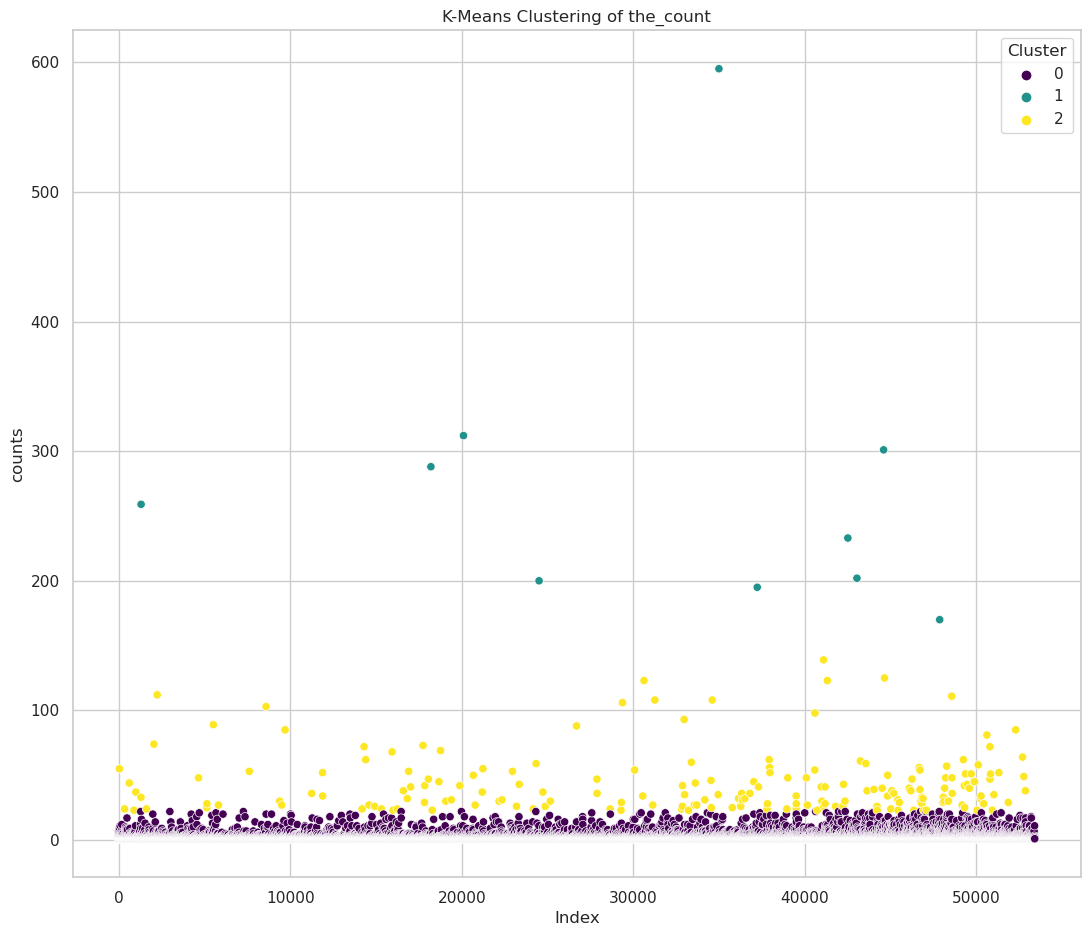

In [8]:
## plot the result of clustering
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图样式
sns.set(style="whitegrid")

# 创建散点图，其中 x 轴是索引，y 轴是 'calculated_host_listings_count' 的值，颜色由聚类标签决定
plt.figure(figsize=(13, 11))
sns.scatterplot(x=grouped_df1.index, y=grouped_df1['counts'], hue=grouped_df1['local_or_company'], palette='viridis')

# 添加图表标题和标签
plt.title('K-Means Clustering of the_count')
plt.xlabel('Index')
plt.ylabel('counts')

# 显示图例和图表
plt.legend(title='Cluster')
plt.show()

In [9]:
## 根据事实定义
# df 是我的 DataFrame
# 将 'local_or_company' 列中等于 0 的值替换为 1，其它值替换为 0
grouped_df1['local_or_company'] = np.where(grouped_df1['local_or_company'] == 0, 1, 0)

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

Max value in local hosts is: 22


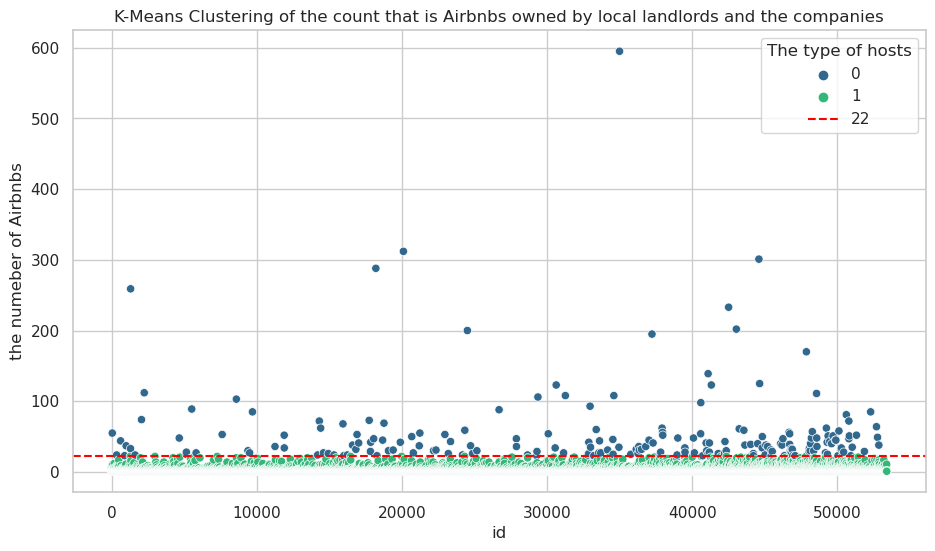

In [10]:
## plot again for checking
# 设置绘图样式
sns.set(style="whitegrid")

# 创建散点图，其中 x 轴是索引，y 轴是 'calculated_host_listings_count' 的值，颜色由聚类标签决定
plt.figure(figsize=(11, 6))
sns.scatterplot(x=grouped_df1.index, y=grouped_df1['counts'], hue=grouped_df1['local_or_company'], palette='viridis')

# 在df中选择出是本地房东的行，然后对筛选后的数据的'calculated_host_listings_count'列求最大值，这样可以算出本地房东拥有房子数量的最大值
# 首先，选择 'local_or_company' 列中值为 1 的行代表本地房东
filtered_rows = grouped_df1[grouped_df1['local_or_company'] == 1]

# 然后，在这些行中找到 'b' 列的最大值
max_value_in_local_hosts = filtered_rows['counts'].max()
print(f'Max value in local hosts is: {max_value_in_local_hosts}')

# 在 y=max_value_in_local_hosts 的位置添加一条红色虚线，并设置标签 max value of the numeber of Airbnbs owned by local landlords
plt.axhline(y=max_value_in_local_hosts, color='red', linestyle='--', label=max_value_in_local_hosts)

# 添加图表标题和标签
plt.title('K-Means Clustering of the count that is Airbnbs owned by local landlords and the companies')
plt.xlabel('id')
plt.ylabel('the numeber of Airbnbs')

# 显示图例和图表
plt.legend(title='The type of hosts')
plt.show()

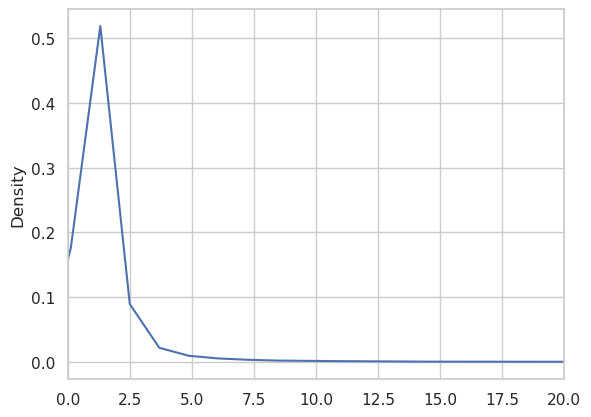

In [11]:
## better know the characteristics of the data and find that maybe Gaussian Mixture Model fit the data
# check data using Kernel Density Estimate (KDE) plot
grouped_df1.counts.plot.kde(xlim=(0,20)); #kernel density estimate plot

In [12]:
# do clustering analysis using Gaussian Mixture Model 
## setting different n_components value sizes to produce different clusters analyses rationality
from sklearn.mixture import GaussianMixture

# grouped_df1 是您的 DataFrame，且包含列 'counts'
# 将 'counts' 列转换为适合聚类的格式（二维数组）
X = grouped_df1[['counts']].values

# 创建 GMM 实例，设置聚类数量为 2
gmm = GaussianMixture(n_components=2, random_state=0)

# 对数据进行拟合和预测
grouped_df1['cluster'] = gmm.fit_predict(X)

# 查看聚类结果
print(grouped_df1.head())

# 检查每个簇的统计数据
print(grouped_df1.groupby('cluster')['counts'].describe())

   host_id  counts  local_or_company  cluster
0     4775       6                 1        1
1     4879       1                 1        0
2     6774       7                 1        1
3     9323       1                 1        0
4     9870       1                 1        0
           count      mean        std  min  25%  50%  75%    max
cluster                                                         
0        49018.0  1.114978   0.318999  1.0  1.0  1.0  1.0    2.0
1         4377.0  7.606351  17.077766  3.0  3.0  4.0  7.0  595.0


In [13]:
## maybe 595 is the outlier, so drop it and try different n_components value sizes
# 找到 'cluster' 列中最大值的索引
max_index = grouped_df1['counts'].idxmax()

# 删除这一行
grouped_df1 = grouped_df1.drop(max_index)

In [14]:
## try the GMM to do clustering again
# 将 'counts' 列转换为适合聚类的格式（二维数组）
X = grouped_df1[['counts']].values

# 创建 GMM 实例，设置聚类数量为 2
gmm = GaussianMixture(n_components=3, random_state=0)

# 对数据进行拟合和预测
grouped_df1['local_or_company'] = gmm.fit_predict(X)

# 查看聚类结果
print(grouped_df1.head())

# 检查每个簇的统计数据
print(grouped_df1.groupby('local_or_company')['counts'].describe())

   host_id  counts  local_or_company  cluster
0     4775       6                 1        1
1     4879       1                 0        0
2     6774       7                 1        1
3     9323       1                 0        0
4     9870       1                 0        0
                    count       mean        std  min  25%  50%   75%    max
local_or_company                                                           
0                 43382.0   1.000000   0.000000  1.0  1.0  1.0   1.0    1.0
1                  1388.0  15.887608  23.798912  6.0  7.0  9.0  16.0  312.0
2                  8624.0   2.541512   0.860106  2.0  2.0  2.0   3.0    5.0


In [15]:
## 根据事实定义
# 将 'local_or_company' 列中等于 0和2 的值替换为 1，其它值替换为 0
grouped_df1['local_or_company'] = np.where(grouped_df1['local_or_company'] == 0|2, 1, 0)

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

Max value in local hosts is: 5


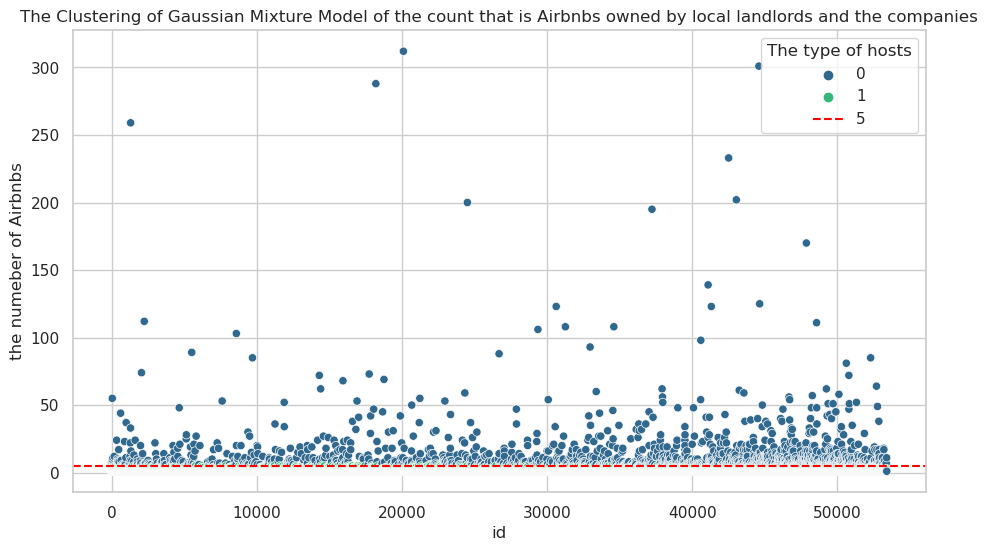

In [16]:
## plot again for visulisation and get the max acount of Airbnbs owned by local landlords
# 设置绘图样式
sns.set(style="whitegrid")

# 创建散点图，其中 x 轴是索引，y 轴是 'calculated_host_listings_count' 的值，颜色由聚类标签决定
plt.figure(figsize=(11, 6))
sns.scatterplot(x=grouped_df1.index, y=grouped_df1['counts'], hue=grouped_df1['local_or_company'], palette='viridis')

# 在df中选择出是本地房东的行，然后对筛选后的数据的'calculated_host_listings_count'列求最大值，这样可以算出本地房东拥有房子数量的最大值
# 首先，选择 'local_or_company' 列中值为 1 的行代表本地房东
filtered_rows = grouped_df1[grouped_df1['local_or_company'] == 1]

# 然后，在这些行中找到 'b' 列的最大值
max_value_in_local_hosts_GMM = filtered_rows['counts'].max()
print(f'Max value in local hosts is: {max_value_in_local_hosts_GMM}')

# 在 y=max_value_in_local_hosts 的位置添加一条红色虚线，并设置标签 max value of the numeber of Airbnbs owned by local landlords
plt.axhline(y=max_value_in_local_hosts_GMM, color='red', linestyle='--', label=max_value_in_local_hosts_GMM)

# 添加图表标题和标签
plt.title('The Clustering of Gaussian Mixture Model of the count that is Airbnbs owned by local landlords and the companies')
plt.xlabel('id')
plt.ylabel('the numeber of Airbnbs')

# 显示图例和图表
plt.legend(title='The type of hosts')
plt.show()

In [17]:
# 对原数据集df进行处理，选择'calculated_host_listings_count'列中小于等于max_value_in_local_hosts值作为新建'local_or_company'的1 (1的行代表本地房东，0代表公司)
df['local_or_company'] = np.where(df['calculated_host_listings_count'] <= max_value_in_local_hosts_GMM, 1, 0)
df.head(14)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,local_or_company
0,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,79,1,41,2022-12-11,0.26,2,360,11,NaN,1
1,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,2023-05-01,0.56,1,73,5,NaN,1
2,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.44201,-0.18739,Private room,42,2,216,2022-10-29,1.45,1,217,9,NaN,1
3,17402,Rental unit in London · ★4.76 · 3 bedrooms · 3...,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,2022-11-19,0.36,9,300,4,NaN,0
4,93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,NaN,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,2022-09-30,0.27,1,40,2,NaN,1
5,93734,Condo in London · ★4.62 · 1 bedroom · 1 bed · ...,497514,William,NaN,Greenwich,51.47618,0.01442,Private room,46,4,180,2023-09-02,1.21,1,196,25,NaN,1
6,24328,Townhouse in London · ★4.90 · 1 bedroom · 1 be...,41759,Joe,NaN,Wandsworth,51.47072,-0.16266,Entire home/apt,250,2,96,2022-07-19,0.62,1,0,0,NaN,1
7,93783,Rental unit in London · ★4.73 · 2 bedrooms · 3...,502496,Darshi Rowan And Tara,NaN,Westminster,51.51881,-0.19650,Entire home/apt,371,5,24,2023-05-29,0.16,1,266,3,NaN,1
8,25123,Home in Barnet · ★4.78 · 1 bedroom · 1 bed · 1...,103583,Grace,NaN,Barnet,51.57438,-0.21081,Private room,29,10,129,2020-03-15,0.79,3,0,0,NaN,1
9,94138,Rental unit in Poplar · ★4.85 · 1 bedroom · 1 ...,503548,Carl,NaN,Tower Hamlets,51.52764,-0.05293,Entire home/apt,75,2,42,2020-03-05,0.64,1,0,0,NaN,1


In [18]:
# df 是 DataFrame，将 DataFrame 导出到当前工作目录的 CSV 文件
df.to_csv('listings_v3.csv', index=False)

In [33]:
import geopandas as gpd
# 读取borough数据
# 替换这里的路径为你解压后.shp文件的实际路径
shapefile_path = 'data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'

# 读取.shp文件
gdf_bor = gpd.read_file(shapefile_path)

# 查看数据
print(gdf_bor.head())

# Check the Projection and use the EPSG:27700 projected CRS
print(gdf_bor.crs)
gdf.to_crs('epsg:27700')

                   NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F       NaN   
1               Croydon  E09000008   8649.441       0.000         F       NaN   
2               Bromley  E09000006  15013.487       0.000         F       NaN   
3              Hounslow  E09000018   5658.541      60.755         F       NaN   
4                Ealing  E09000009   5554.428       0.000         F       NaN   

   SUB_2006                                           geometry  
0       NaN  POLYGON ((516401.600 160201.800, 516407.300 16...  
1       NaN  POLYGON ((535009.200 159504.700, 535005.500 15...  
2       NaN  POLYGON ((540373.600 157530.400, 540361.200 15...  
3       NaN  POLYGON ((521975.800 178100.000, 521967.700 17...  
4       NaN  POLYGON ((510253.500 182881.600, 510249.900 18...  
PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."
5,Havering,E09000016,11445.735,210.763,F,NaN,NaN,"POLYGON ((549893.900 181459.800, 549894.600 18..."
6,Hillingdon,E09000017,11570.063,0.000,F,NaN,NaN,"POLYGON ((510599.800 191689.500, 510615.200 19..."
7,Harrow,E09000015,5046.330,0.000,F,NaN,NaN,"POLYGON ((510599.800 191689.500, 510660.000 19..."
8,Brent,E09000005,4323.270,0.000,F,NaN,NaN,"POLYGON ((525201.000 182512.600, 525181.500 18..."
9,Barnet,E09000003,8674.837,0.000,F,NaN,NaN,"POLYGON ((524579.900 198355.200, 524594.300 19..."


In [34]:
# Checking Lat/Long for the csv
print(f"The bottom-left corner is {df.longitude.min():0.1f}, {df.latitude.min():0.1f}")
print(f"The top-right corner is {df.longitude.max():0.1f}, {df.latitude.max():0.1f}")

The bottom-left corner is -0.5, 51.3
The top-right corner is 0.3, 51.7


In [72]:
# convert lat/long to GeoSeries (converted the InsideAirbnb data to a GeoDataFrame)
gdf_point = gpd.GeoDataFrame(df, 
      geometry=gpd.points_from_xy(df.longitude, df.latitude, crs='epsg:4326'))
# make sure that gdf_point and gdf_bor have the same projected CRS
gdf_point=gdf_point.to_crs('epsg:27700')
gdf_bor=gdf_bor.to_crs('epsg:27700')

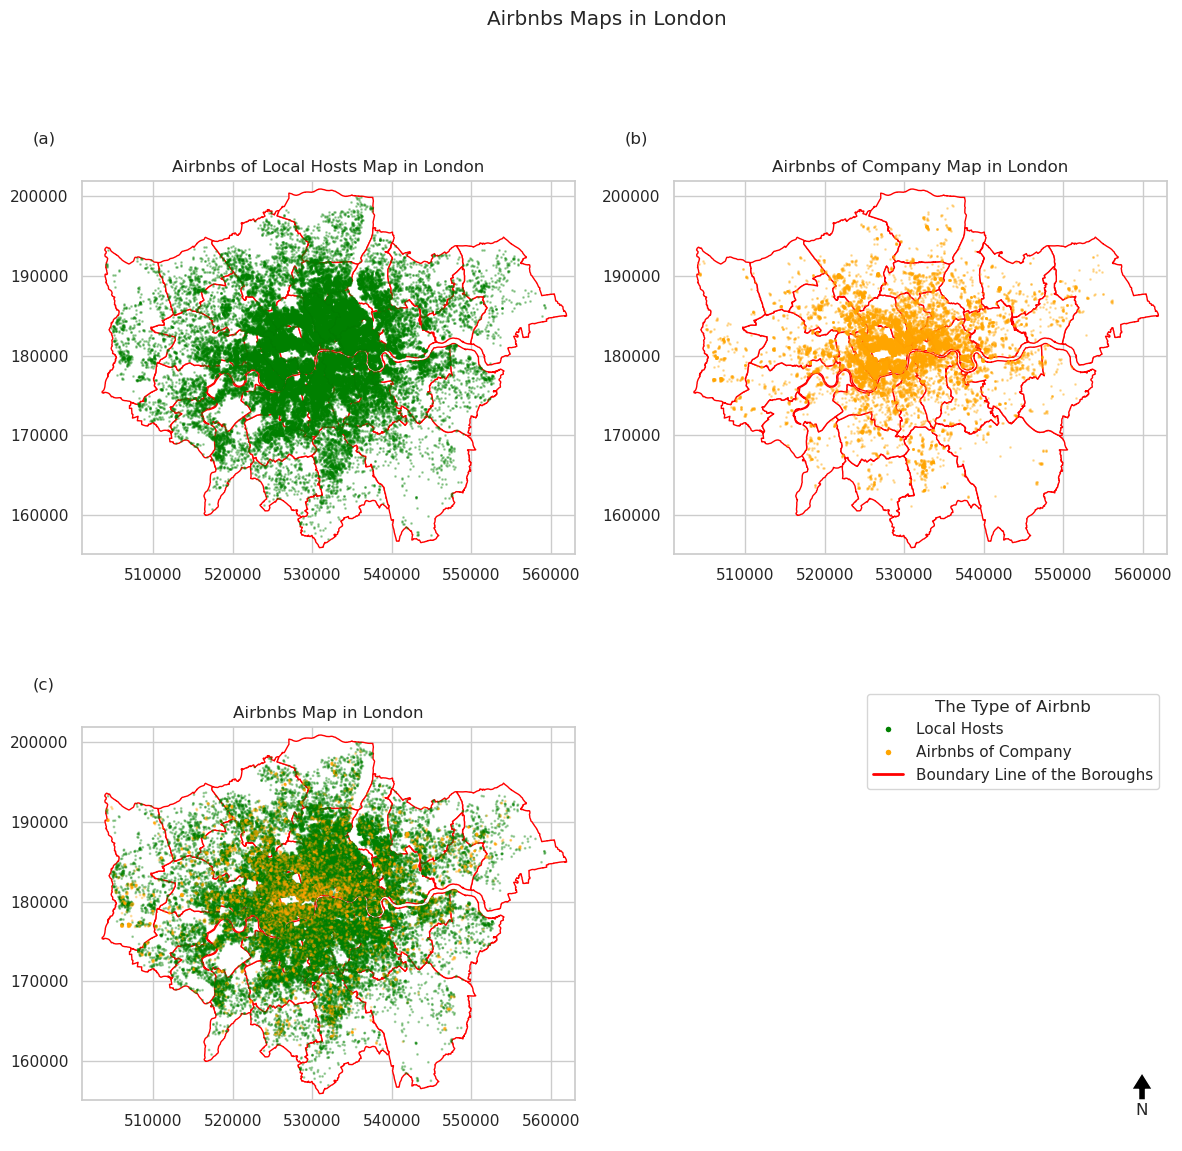

In [104]:
# Creates a new figure with specified number of
# subplots (we'll see more of this later) and 
# and the specified size (in inches by default).

import matplotlib.pyplot as plt
import geopandas as gpd

# 创建子图
fig, ax = plt.subplots(2, 2, figsize=(14, 13))

# 绘制底图
gdf_bor.plot(ax=ax[0,0], edgecolor='red', facecolor='white')
gdf_bor.plot(ax=ax[0,1], edgecolor='red', facecolor='white')
gdf_bor.plot(ax=ax[1,0], edgecolor='red', facecolor='white')

# 添加矢量点数据
gdf_point[gdf_point['local_or_company'] == 1].plot(ax=ax[0,0], color='green', alpha=0.3, markersize=1)
gdf_point[gdf_point['local_or_company'] == 0].plot(ax=ax[0,1], color='orange', alpha=0.3, markersize=1)
gdf_point.plot(ax=ax[1,0], color=gdf_point['local_or_company'].map({1: 'green', 0: 'orange'}), alpha=0.3 ,markersize=1)

# 添加标题和图幅标号
ax[0,0].set_title('Airbnbs of Local Hosts Map in London')
ax[0,0].text(-0.1, 1.1, '(a)', transform=ax[0,0].transAxes)

ax[0,1].set_title('Airbnbs of Company Map in London')
ax[0,1].text(-0.1, 1.1, '(b)', transform=ax[0,1].transAxes)

ax[1,0].set_title('Airbnbs Map in London')
ax[1,0].text(-0.1, 1.1, '(c)', transform=ax[1,0].transAxes)

# Set the x and y limits
ax[0,0].set_xlim(501000,563000)
ax[0,0].set_ylim(155000,202000)
ax[0,1].set_xlim(501000,563000)
ax[0,1].set_ylim(155000,202000)
ax[1,0].set_xlim(501000,563000)
ax[1,0].set_ylim(155000,202000)
# 添加图例、比例尺和指北针到ax[1,1]

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Local Hosts', markersize=5, markerfacecolor='green'),
                   Line2D([0], [0], marker='o', color='w', label='Airbnbs of Company', markersize=5, markerfacecolor='orange'), 
                   Line2D([0], [0], color='red', lw=2, linestyle='-', label='Boundary Line of the Boroughs')]
ax[1, 1].legend(handles=legend_elements, title='The Type of Airbnb')
ax[1, 1].axis('off') 

# 绘制比例尺和指北针（使用epsg:27700要麻烦一些）
# 绘制比例尺
def draw_scalebar(ax, xpos, ypos, length, unit='m', fontsize=10):
    """
    在指定的坐标轴上绘制线段比例尺。
    
    参数:
    ax -- matplotlib的坐标轴对象
    xpos, ypos -- 比例尺的起始位置（单位：米）
    length -- 比例尺代表的实际长度（单位：米）
    unit -- 单位标记（默认为米）
    fontsize -- 字体大小
    """
    # 绘制比例尺线段
    ax.plot([xpos, xpos + length], [ypos, ypos], color='black', lw=2)
    # 绘制比例尺端点的小线
    ax.plot([xpos, xpos], [ypos - 100, ypos + 100], color='black', lw=2)  # 端点线的长度为100米
    ax.plot([xpos + length, xpos + length], [ypos - 100, ypos + 100], color='black', lw=2)

    # 添加长度标注
    ax.text(xpos + length / 2, ypos - 200, f'{length} {unit}', horizontalalignment='center', fontsize=fontsize)


# 在适当的子图上绘制比例尺


def draw_north_arrow(ax, x, y, arrow_length=0.1, text='N'):
    # 绘制指向北方的箭头
    ax.annotate(text, xy=(x, y + arrow_length), xytext=(x, y),
                arrowprops=dict(facecolor='black', width=5, headwidth=15),
                ha='center', va='bottom')
# 假设 ax 是你的地图的Axes对象
draw_north_arrow(ax[1, 1], x=0.95, y=0.05)

# 设置整体标题
fig.suptitle('Airbnbs Maps in London')

# 保存图形

plt.show()